In [21]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.loading import *
from src.saving import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


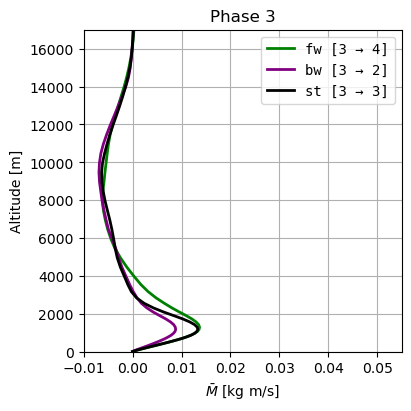

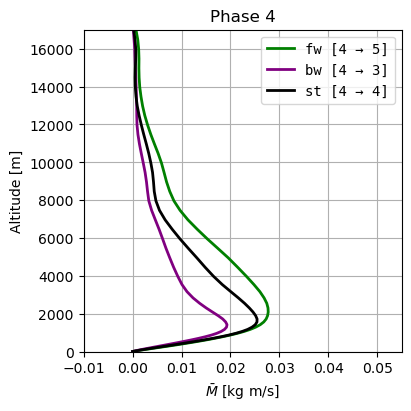

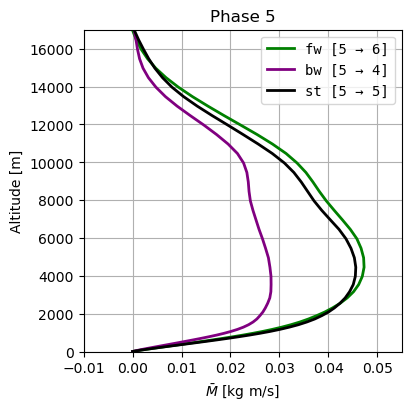

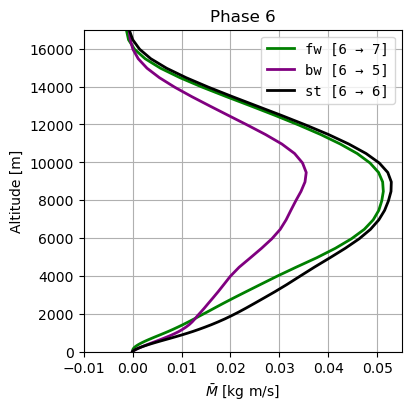

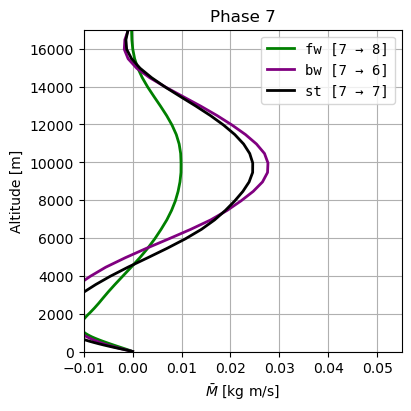

In [56]:
# Plot mean vertical motions
#
for phase in [3, 4, 5, 6, 7]:
    fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
    for trans_type, color, delta in zip(['fw', 'bw', 'st'], ['green', 'purple', 'black'], [1, -1, 0]):
        w = load_phase_transition_composite_mean('wa', phase, trans_type)
        mass_flux = w * load_gsam_reference_profiles().rho
        mass_flux.plot(ax=ax, y='z', label=f'{trans_type} [{phase} → {phase+delta}]', color=color, lw=2)
    ax.set_xlim(-0.01, 0.055)
    ax.set_ylabel('Altitude [m]')
    ax.set_xlabel(r'$\bar{M}$ [kg m/s]')
    ax.legend(prop={'family': 'monospace'}, loc='upper right')
    ax.grid()
    ax.set_title(f'Phase {phase}')
    ax.set_ylim(0, 17e3)
    save_figure(fig, f'large-scale_M_comparison_phase{phase}.pdf')


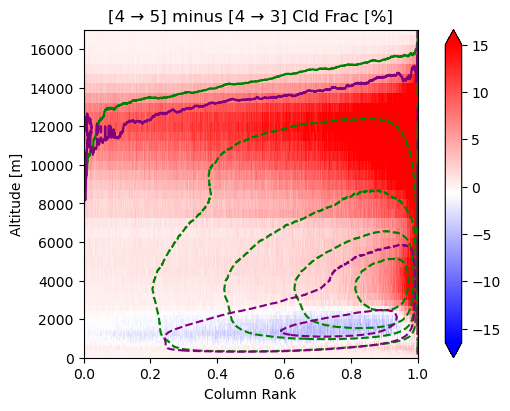

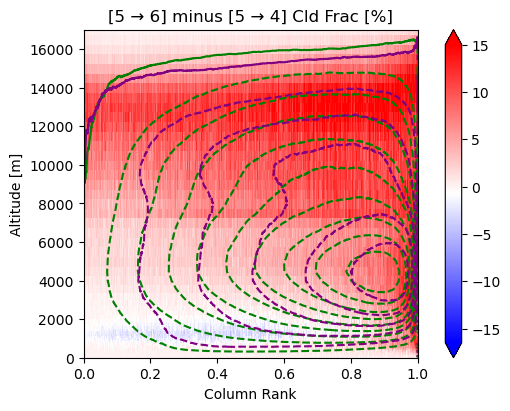

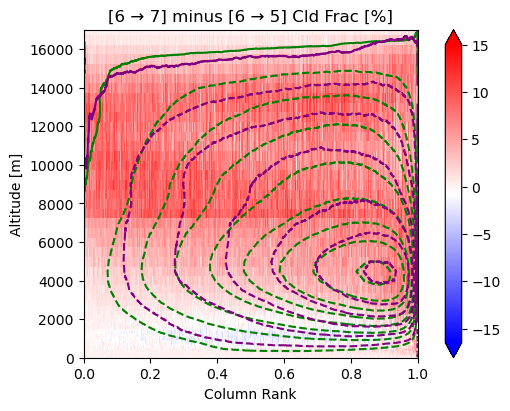

In [57]:
# Plot mean circulation and cloud fractions
#
for phase in [4, 5, 6]:
    fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
    # Plot delta cloud fraction
    #
    fw_cf = load_phase_transition_composite('cloudfrac', phase, 'fw')
    bw_cf = load_phase_transition_composite('cloudfrac', phase, 'bw')
    delta = 100*(fw_cf - bw_cf)
    delta = delta.coarsen({'column': 5}).mean()
    delta.plot(ax=ax, y='z', cmap=plt.cm.bwr, norm=colors.Normalize(15, -15), cbar_kwargs={'label': None})
    for trans_type, color in zip(['fw', 'bw'], ['green', 'purple']):
        # Plot circulations
        #
        w = load_phase_transition_composite_anomaly('wa', phase, trans_type)
        circ = w.cumsum('column')
        circ.plot.contour(ax=ax, y='z', levels=np.linspace(-150, 0, 10), colors=color)
    ax.set_ylim(0, 17e3)
    ax.set_title(f'[{phase} → {phase+1}] minus [{phase} → {phase-1}] Cld Frac [%]')
    ax.set_ylabel('Altitude [m]')
    ax.set_xlabel('Column Rank')
    save_figure(fig, f'cloudfrac_difference_phase{phase}.pdf')
        
